<h1>Create initial images to be used in feather tutorial</h1>

In [1]:
# download base images
from xradio.data.datasets import download
download("feather_sim_sd_c1_pI.im")
download("feather_sim_vla_c1_pI.im")

url https://www.dropbox.com/scl/fi/z4e57yy19xm44sfmkyzaz/feather_sim_sd_c1_pI.im.zip?rlkey=30o6aqrmwv2i630tdn7003ohr


./feather_sim_sd_c1_pI.im.zip: 100%|██████████████████████████████████████████████| 56.5M/56.5M [00:01<00:00, 33.7MiB/s]


url https://www.dropbox.com/scl/fi/98eysvd1rjyuvwrvrr600/feather_sim_vla_c1_pI.im.zip?rlkey=c4ny98duexaodmsje0lpz2fh3&dl


./feather_sim_vla_c1_pI.im.zip: 100%|█████████████████████████████████████████████| 59.4M/59.4M [00:01<00:00, 33.4MiB/s]


In [160]:
# from graphviper.dask.client import local_client
# viper_client = local_client(cores=4, memory_limit="4GB")

# import dask
# dask.config.set(scheduler="synchronous")
# dask.config.set(scheduler="threads")

<h2>Inputs to be specified by user</h2>

In [163]:
# ra, dec size, should not exceed 4096 x 4096
imsize = [1024, 1024]

# number of channels
nchan = 16

# currently, there is only one polarization and it is I

In [164]:
from xradio.image.image import (
    make_empty_sky_image
)
import numpy as np
rad_per_arcsec = np.pi/180/3600
skel_xds = make_empty_sky_image(
    phase_center=[0.6, -0.2],
    image_size=imsize,
    cell_size=[15*rad_per_arcsec, 15*rad_per_arcsec],
    chan_coords=np.linspace(1.4e9, 1.5e9, nchan),
    pol_coords=["I"],
    time_coords=[0],
)
skel_xds

<xarray.Dataset>
Dimensions:          (time: 1, polarization: 1, frequency: 16, l: 1024, m: 1024)
Coordinates:
  * time             (time) float64 0.0
  * polarization     (polarization) <U1 'I'
  * frequency        (frequency) float64 1.4e+09 1.407e+09 ... 1.493e+09 1.5e+09
    velocity         (frequency) float64 1.1e+07 9.626e+06 ... -9.626e+06
  * l                (l) float64 0.03723 0.03716 0.03709 ... -0.03709 -0.03716
  * m                (m) float64 -0.03723 -0.03716 -0.03709 ... 0.03709 0.03716
    right_ascension  (l, m) float64 0.6383 0.6383 0.6383 ... 0.5623 0.5623
    declination      (l, m) float64 -0.2371 -0.237 -0.237 ... -0.1628 -0.1627
Data variables:
    *empty*
Attributes:
    direction:        {'reference': {'type': 'sky_coord', 'frame': 'FK5', 'eq...
    active_mask:      
    beam:             None
    object_name:      
    obsdate:          {'type': 'time', 'scale': 'UTC', 'format': 'MJD', 'valu...
    observer:         Karl Jansky
    pointing_center:  {'value': [0.6, -0.2], 'initial': True}
    description:      
    telescope:        {'name': 'ALMA', 'position': {'type': 'position', 'elli...
    history:          None

In [165]:
from xradio.image import read_image

sel_dict = {}
if imsize[0] < 4096:
    blc = 2048 - imsize[0]//2
    l_slice = slice(blc, blc + imsize[0])
    sel_dict["l"] = l_slice
if imsize[1] < 4096:
    blc = 2048 - imsize[1]//2
    m_slice = slice(blc, blc + imsize[1])
    sel_dict["m"] = m_slice
xds_sd_temp = read_image("feather_sim_sd_c1_pI.im").isel(sel_dict)
xds_sd_temp

Successful readonly open of default-locked table feather_sim_sd_c1_pI.im: 1 columns, 1 rows


<xarray.Dataset>
Dimensions:          (time: 1, polarization: 1, frequency: 1, l: 1024, m: 1024)
Coordinates:
  * time             (time) float64 5.154e+04
  * polarization     (polarization) <U1 'I'
  * frequency        (frequency) float64 1.414e+09
    velocity         (frequency) float64 1.352e+06
  * l                (l) float64 0.03723 0.03716 0.03709 ... -0.03709 -0.03716
  * m                (m) float64 -0.03723 -0.03716 -0.03709 ... 0.03709 0.03716
    right_ascension  (l, m) float64 0.03727 0.03727 0.03727 ... 6.246 6.246
    declination      (l, m) float64 -0.03724 -0.03717 -0.0371 ... 0.0371 0.03717
Data variables:
    sky              (time, polarization, frequency, l, m) float32 dask.array<chunksize=(1, 1, 1, 1024, 1024), meta=np.ndarray>
Attributes:
    direction:        {'reference': {'frame': 'FK5', 'type': 'sky_coord', 'eq...
    telescope:        {'name': 'ALMA', 'position': {'type': 'position', 'elli...
    obsdate:          {'type': 'time', 'scale': 'UTC', 'units': 'd', 'value':...
    pointing_center:  {'value': array([0., 0.]), 'initial': True}
    observer:         Karl Jansky
    object_name:      
    beam:             {'major': {'type': 'quantity', 'value': 0.0040724349213...
    user:             {}
    active_mask:      None
    description:      None
    history:          <xarray.Dataset>\nDimensions:    (row: 6, TIME: 6, PRIO...

In [166]:
xds_int_temp = read_image("feather_sim_vla_c1_pI.im").isel(sel_dict)
#xds_int_temp
xds_int_temp

Successful readonly open of default-locked table feather_sim_vla_c1_pI.im: 1 columns, 1 rows


<xarray.Dataset>
Dimensions:          (time: 1, polarization: 1, frequency: 1, l: 1024, m: 1024)
Coordinates:
  * time             (time) float64 5.876e+04
  * polarization     (polarization) <U1 'I'
  * frequency        (frequency) float64 1.414e+09
    velocity         (frequency) float64 2.119e+05
  * l                (l) float64 0.03723 0.03716 0.03709 ... -0.03709 -0.03716
  * m                (m) float64 -0.03723 -0.03716 -0.03709 ... 0.03709 0.03716
    right_ascension  (l, m) float64 0.03727 0.03727 0.03727 ... 6.246 6.246
    declination      (l, m) float64 -0.03724 -0.03717 -0.0371 ... 0.0371 0.03717
Data variables:
    sky              (time, polarization, frequency, l, m) float32 dask.array<chunksize=(1, 1, 1, 1024, 1024), meta=np.ndarray>
Attributes:
    direction:        {'reference': {'frame': 'FK5', 'type': 'sky_coord', 'eq...
    telescope:        {'name': 'VLA', 'position': {'type': 'position', 'ellip...
    obsdate:          {'type': 'time', 'scale': 'UTC', 'units': 'd', 'value':...
    pointing_center:  {'value': array([0., 0.]), 'initial': False}
    observer:         CASA simulator
    object_name:      fake
    beam:             {'major': {'type': 'quantity', 'value': 0.0003175938332...
    user:             {'INSTRUME': 'VLA', 'distance': 0.0, 'mpiprocs': 1, 'ch...
    active_mask:      None
    description:      None
    history:          <xarray.Dataset>\nDimensions:    (row: 98, TIME: 98, PR...

In [155]:
import dask.array as da
import xarray as xr
dm = skel_xds.sizes
data = da.zeros(
    [
        dm["time"], dm["polarization"],
        dm["frequency"], dm["l"], dm["m"]
    ], dtype=np.float32
)
zeros = xr.DataArray(data=data, coords=skel_xds.coords, dims=skel_xds.dims)
zeros

<xarray.DataArray 'zeros_like-34d564df5c17d0a392f03bbff6423736' (time: 1,
                                                                 polarization: 1,
                                                                 frequency: 16,
                                                                 l: 1024,
                                                                 m: 1024)>
dask.array<zeros_like, shape=(1, 1, 16, 1024, 1024), dtype=float32, chunksize=(1, 1, 16, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time             (time) float64 0.0
  * polarization     (polarization) <U1 'I'
  * frequency        (frequency) float64 1.4e+09 1.407e+09 ... 1.493e+09 1.5e+09
    velocity         (frequency) float64 1.1e+07 9.626e+06 ... -9.626e+06
  * l                (l) float64 0.03723 0.03716 0.03709 ... -0.03709 -0.03716
  * m                (m) float64 -0.03723 -0.03716 -0.03709 ... 0.03709 0.03716
    right_ascension  (l, m) float64 0.6383 0.6383 0.6383 ... 0.5623 0.5623
    declination      (l, m) float64 -0.2371 -0.237 -0.237 ... -0.1628 -0.1627

In [172]:
import copy

sky = xr.DataArray(
    zeros.copy(), coords=skel_xds.coords, dims=skel_xds.dims
)
for i in (0, 1):
    print(i)
    xds = copy.deepcopy(skel_xds)
    xds["sky"] = sky.copy()
    for j in range(0, nchan, 16):
        min_chan = j
        max_chan = min(j+16, nchan)
        fx = xds_sd_temp if i == 0 else xds_int_temp
        print(id(fx))
        xds["sky"][{"frequency": slice(min_chan, max_chan)}] = (
            fx["sky"].values
        )
        print(f"xds {id(xds)}")
    if i == 0:
        xds_sd = xds
        xds_sd.attrs["beam"] = copy.deepcopy(xds_sd_temp.attrs["beam"])
    else:
        xds_int = xds
        xds_int.attrs["beam"] = copy.deepcopy(xds_int_temp.attrs["beam"])
    
xds_sd

0
140373662805440
xds 140373386143312
1
140373386140960
xds 140373386146224


<xarray.Dataset>
Dimensions:          (time: 1, polarization: 1, frequency: 16, l: 1024, m: 1024)
Coordinates:
  * time             (time) float64 0.0
  * polarization     (polarization) <U1 'I'
  * frequency        (frequency) float64 1.4e+09 1.407e+09 ... 1.493e+09 1.5e+09
    velocity         (frequency) float64 1.1e+07 9.626e+06 ... -9.626e+06
  * l                (l) float64 0.03723 0.03716 0.03709 ... -0.03709 -0.03716
  * m                (m) float64 -0.03723 -0.03716 -0.03709 ... 0.03709 0.03716
    right_ascension  (l, m) float64 0.6383 0.6383 0.6383 ... 0.5623 0.5623
    declination      (l, m) float64 -0.2371 -0.237 -0.237 ... -0.1628 -0.1627
Data variables:
    sky              (time, polarization, frequency, l, m) float32 dask.array<chunksize=(1, 1, 16, 1024, 1024), meta=np.ndarray>
Attributes:
    direction:        {'reference': {'type': 'sky_coord', 'frame': 'FK5', 'eq...
    active_mask:      
    beam:             {'major': {'type': 'quantity', 'value': 0.0040724349213...
    object_name:      
    obsdate:          {'type': 'time', 'scale': 'UTC', 'format': 'MJD', 'valu...
    observer:         Karl Jansky
    pointing_center:  {'value': [0.6, -0.2], 'initial': True}
    description:      
    telescope:        {'name': 'ALMA', 'position': {'type': 'position', 'elli...
    history:          None

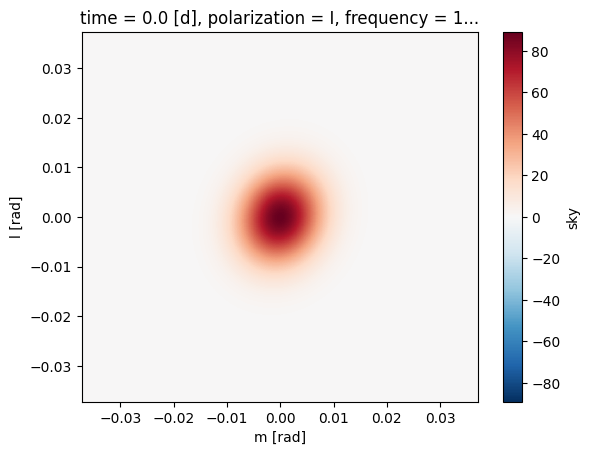

In [173]:
xds_sd["sky"].sel(polarization="I").isel(frequency=0, time=0).plot()

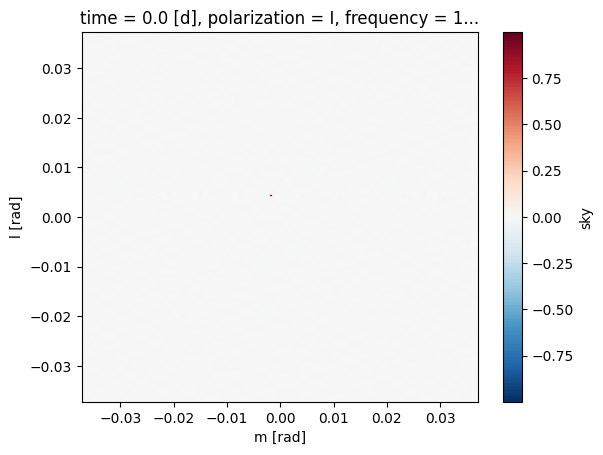

In [174]:
# This is a point source, so may not be obvious
# in this plot
xds_int["sky"].sel(polarization="I").isel(frequency=0, time=0).plot()

In [175]:
# These are the input images for the next step

import os, shutil

from xradio.image import write_image
for xds, outfile in zip([xds_sd, xds_int], ["sd.zarr", "int.zarr"]):
    if os.path.exists(outfile):
        shutil.rmtree(outfile)
    write_image(xds, outfile, "zarr")
    print(f"Wrote {outfile}")

Wrote sd.zarr
Wrote int.zarr
